# WORKING WITH NUMERIC DATA

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


life_expentancy = pd.read_csv(r"c:/users/danhaya/arewads/arewads-fellowship/life_expectancy.csv")
print(life_expentancy.head())

           Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                      56.308   
1  Lower middle income  2001                      47.059   
2  Upper middle income  2001                      74.288   
3          High income  2001                         NaN   
4          High income  2001                      74.544   

   Prevelance of Undernourishment      CO2  Health Expenditure %  \
0                            47.8    730.0                   NaN   
1                            67.5  15960.0              4.483516   
2                         

In [2]:
print(life_expentancy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [20]:
threshold = len(life_expentancy)*0.05

col_to_drop = life_expentancy.columns[life_expentancy.isna().sum() <= threshold]
life_expentancy.dropna(subset=col_to_drop, inplace=True)

In [4]:
life_expentancy.isna().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         112
Prevelance of Undernourishment     532
CO2                                  0
Health Expenditure %                66
Education Expenditure %            968
Unemployment                       190
Corruption                        2179
Sanitation                        1171
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [21]:
cols_with_missing_value = life_expentancy.columns[life_expentancy.isna().sum() > 0]
print(cols_with_missing_value)

Index(['Life Expectancy World Bank', 'Prevelance of Undernourishment',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation'],
      dtype='object')


In [22]:
for col in cols_with_missing_value:
    life_expentancy[col].fillna(life_expentancy[col].median())

print(life_expentancy.isna().sum())

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         112
Prevelance of Undernourishment     532
CO2                                  0
Health Expenditure %                66
Education Expenditure %            968
Unemployment                       190
Corruption                        2179
Sanitation                        1171
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64


In [23]:
missing_col_dict = life_expentancy.groupby('Region')[['Corruption', 'Sanitation', 'Unemployment', 'Education Expenditure %', 'Health Expenditure %', 'Prevelance of Undernourishment', 'Life Expectancy World Bank']].median().to_dict()
life_expentancy[['Corruption', 'Sanitation', 'Unemployment', 'Education Expenditure %', 'Health Expenditure %', 'Prevelance of Undernourishment', 'Life Expectancy World Bank']] = life_expentancy[['Corruption', 'Sanitation', 'Unemployment', 'Education Expenditure %', 'Health Expenditure %', 'Prevelance of Undernourishment', 'Life Expectancy World Bank']].fillna(life_expentancy['Region'].map(missing_col_dict))


In [24]:
print(life_expentancy.isna().sum())

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         112
Prevelance of Undernourishment     532
CO2                                  0
Health Expenditure %                66
Education Expenditure %            968
Unemployment                       190
Corruption                        2179
Sanitation                        1171
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64


In [11]:
print(life_expentancy.dtypes)

Country Name                       object
Country Code                       object
Region                             object
IncomeGroup                        object
Year                                int64
Life Expectancy World Bank        float64
Prevelance of Undernourishment    float64
CO2                               float64
Health Expenditure %              float64
Education Expenditure %           float64
Unemployment                      float64
Corruption                        float64
Sanitation                        float64
Injuries                          float64
Communicable                      float64
NonCommunicable                   float64
dtype: object


In [25]:
life_expentancy.columns = life_expentancy.columns.map(lambda x: x.lower())
print(life_expentancy.head())

           country name country code                      region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           incomegroup  year  life expectancy world bank  \
0           Low income  2001                      56.308   
1  Lower middle income  2001                      47.059   
2  Upper middle income  2001                      74.288   
3          High income  2001                         NaN   
4          High income  2001                      74.544   

   prevelance of undernourishment      co2  health expenditure %  \
0                            47.8    730.0                   NaN   
1                            67.5  15960.0              4.483516   
2                         

In [26]:
life_expentancy.columns = life_expentancy.columns.str.replace(' ', '_')
print(life_expentancy.columns)

Index(['country_name', 'country_code', 'region', 'incomegroup', 'year',
       'life_expectancy_world_bank', 'prevelance_of_undernourishment', 'co2',
       'health_expenditure_%', 'education_expenditure_%', 'unemployment',
       'corruption', 'sanitation', 'injuries', 'communicable',
       'noncommunicable'],
      dtype='object')


In [27]:
life_expentancy['region'].value_counts()

region
Sub-Saharan Africa            836
Europe & Central Asia         836
Latin America & Caribbean     532
East Asia & Pacific           456
Middle East & North Africa    304
South Asia                    152
North America                  38
Name: count, dtype: int64

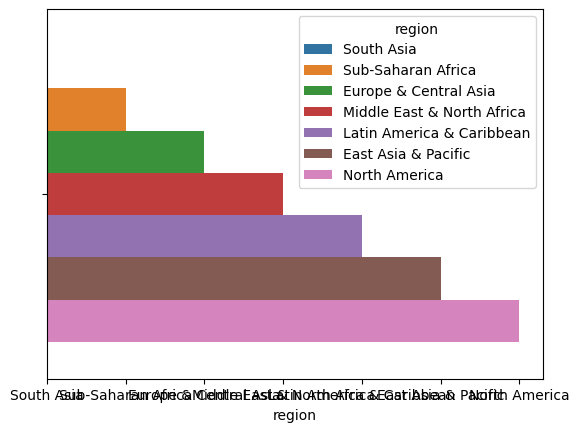

In [31]:
sns.barplot(data = life_expentancy,
            x = 'region',
            hue = 'region')

plt.show()

In [32]:
life_expentancy['median_co2_by_region'] = life_expentancy.groupby('region')['co2'].transform(lambda x: x.median())

In [35]:
print(life_expentancy[['median_co2_by_region', 'region']].head())

   median_co2_by_region                      region
0          12344.999790                  South Asia
1           2460.000019          Sub-Saharan Africa
2          43634.998322       Europe & Central Asia
3          43634.998322       Europe & Central Asia
4          53115.000458  Middle East & North Africa


In [37]:
#quick overveiw

print(life_expentancy['education_expenditure_%'].describe())

count    2186.000000
mean        4.599110
std         2.083518
min         0.850320
25%         3.159202
50%         4.396205
75%         5.519855
max        23.270000
Name: education_expenditure_%, dtype: float64


In [38]:
life_expentancy['life_expectancy_world_bank'].describe()

count    3042.000000
mean       69.576298
std         9.438899
min        40.369000
25%        63.369250
50%        72.053500
75%        76.567250
max        84.356341
Name: life_expectancy_world_bank, dtype: float64

In [39]:
life_expentancy['year'].dtypes

dtype('int64')

In [40]:
life_expentancy['year'] = pd.to_datetime(life_expentancy["year"])

In [41]:
life_expentancy.dtypes

country_name                              object
country_code                              object
region                                    object
incomegroup                               object
year                              datetime64[ns]
life_expectancy_world_bank               float64
prevelance_of_undernourishment           float64
co2                                      float64
health_expenditure_%                     float64
education_expenditure_%                  float64
unemployment                             float64
corruption                               float64
sanitation                               float64
injuries                                 float64
communicable                             float64
noncommunicable                          float64
median_co2_by_region                     float64
dtype: object

C:\Users\Danhaya\AppData\Local\Temp\ipykernel_7232\2665189637.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=life_expentancy,


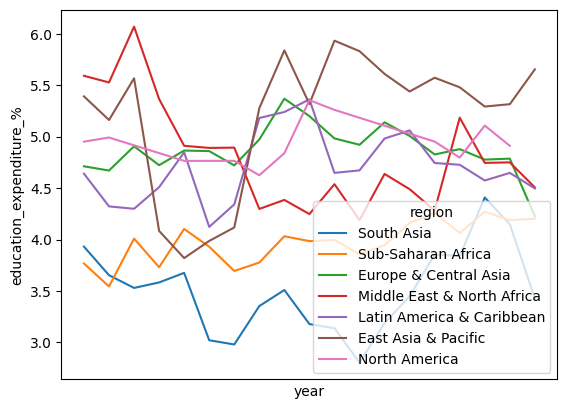

In [43]:
sns.lineplot(data=life_expentancy,
             x='year',
             y='education_expenditure_%',
             hue = 'region',
             ci =None)

plt.show()

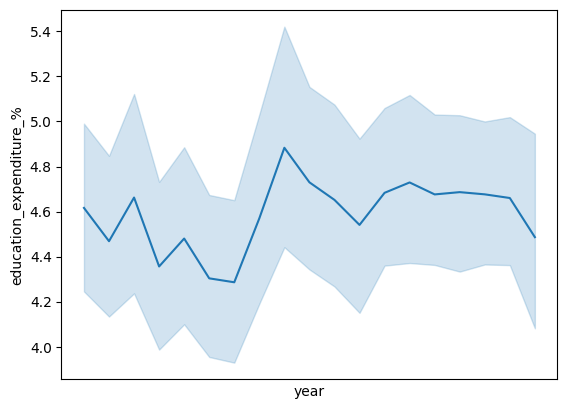

In [45]:
sns.lineplot(data=life_expentancy,
             x='year',
             y='education_expenditure_%')

plt.show()